### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
import moviepy.editor as mpy
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns

# Plotting style
plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_format='retina'

# Function to generate animations
def mpl_fig2array(plt):
    with io.BytesIO() as buffer:  # use buffer memory
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        img = Image.open(buffer)
        return np.asarray(img)

### Load data

In [2]:
l_study_names = []
l_bunch_nb = [
    76,
    2754,
    1731,
    2682,
    607,
    77,
    3342,
    2053,
    2803,
    74,
    1403,
    2049,
    139,
    848,
    1912,
    398,
    2633,
    2300,
    2854,
    126,
    897,
    222,
    1043,
    154,
    3435,
    942,
    1036,
]
for bunch_nb in l_bunch_nb:
    # Define study
    l_study_names.append(f"opt_flathv_75_1500_withBB_chroma5_1p4_{bunch_nb}")

In [3]:
l_df = []
for study_name in l_study_names:
    try:
        # Load dataframe
        df = pd.read_parquet(f"../{study_name}/da.parquet")
        print(df)
    except:
        df = pd.DataFrame()

    # Round all numbers to 3 decimals
    df = df.round(3)
    l_df.append(df)

df



          normalized amplitude in xy-plane      q1      q2            nb  \
name 1                                                                     
madx_001                           6.03125  62.310  60.316  1.400000e+11   
madx_002                           5.68750  62.310  60.317  1.400000e+11   
madx_003                           6.09375  62.310  60.318  1.400000e+11   
madx_004                           5.68750  62.310  60.319  1.400000e+11   
madx_005                           6.12500  62.310  60.320  1.400000e+11   
madx_006                           5.78125  62.310  60.321  1.400000e+11   
madx_007                           5.65625  62.310  60.322  1.400000e+11   
madx_008                           5.71875  62.310  60.323  1.400000e+11   
madx_009                           5.53125  62.310  60.324  1.400000e+11   
madx_010                           5.25000  62.310  60.325  1.400000e+11   
madx_013                           5.68750  62.311  60.317  1.400000e+11   
madx_014    

""


In [4]:
l_df_to_plot = []
for df in l_df:
    # Reshape for plotting
    try:
        df_to_plot = df.pivot(index="q2", columns="q1", values="normalized amplitude in xy-plane")
    except:
        df_to_plot = pd.DataFrame()
    l_df_to_plot.append(df_to_plot)
    
df_to_plot


""


In [5]:
# Replace nan by 0 in all df_to_plot
#for i in range(len(l_df_to_plot)):
#    l_df_to_plot[i] = l_df_to_plot[i].fillna(0)
l_df_to_plot

[q1      62.310  62.311  62.312  62.313  62.314  62.315  62.316  62.317  \
 q2                                                                       
 60.316   6.031     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 60.317   5.688   5.688     NaN     NaN     NaN     NaN     NaN     NaN   
 60.318   6.094   5.688   7.062     NaN     NaN     NaN     NaN     NaN   
 60.319   5.688   5.969   7.344   7.406     NaN     NaN     NaN     NaN   
 60.320   6.125   5.812   6.750   7.406   7.344     NaN     NaN     NaN   
 60.321   5.781   6.375   6.594   6.500   6.750   7.188     NaN     NaN   
 60.322   5.656   5.594   6.031   6.750   6.594   6.844   6.719     NaN   
 60.323   5.719   5.469   5.875   6.438   5.844   6.375   6.625   6.719   
 60.324   5.531   5.531   5.688   6.062   5.969   5.844   6.125   6.094   
 60.325   5.250   5.125   5.469   5.312   5.281   5.406   5.438   5.625   
 
 q1      62.318  62.319  
 q2                      
 60.316     NaN     NaN  
 60.317     NaN     

### Plot heatmap for tune-tune scan

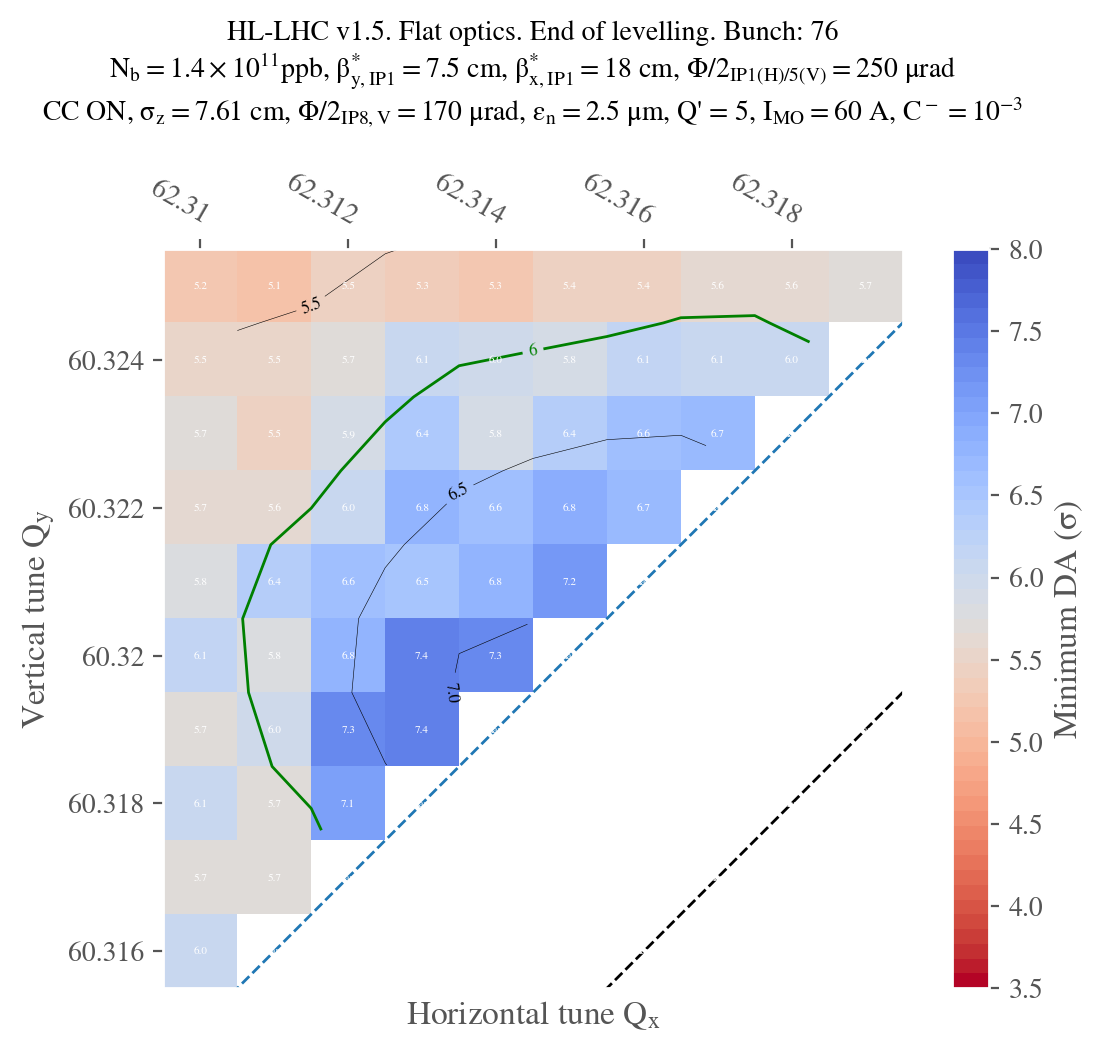

In [16]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(df_to_plot, bunch_id = np.nan):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()
    cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)
    cmap.set_bad('w')

    fig, ax = plt.subplots()
    im = ax.imshow(data_array, cmap=cmap, vmin=3.5, vmax=8)
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])


    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="w", fontsize=4
            )
            
    # Smooth data for contours
    # make the matrix symmetric by replacing the lower triangle with the upper triangle
    data_smoothed = np.copy(data_array)
    data_smoothed[np.isnan(data_array)] = 0
    data_smoothed = data_smoothed + data_smoothed.T - np.diag(data_array.diagonal())
    data_smoothed = gaussian_filter(data_smoothed, 1.0)

    # Mask the lower triangle of the smoothed matrix
    mask =  np.tri(data_smoothed.shape[0], k=-1)
    mx = np.ma.masked_array(data_smoothed, mask=mask.T)

    # Plot contours
    CSS = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="black",
        levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)

    # # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
    # Diagonal lines
    ax.plot([0, 1000], [-1, 999], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-11, 989], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-6, 994], color="black", linestyle="--", linewidth=1)

    try: 
        nb_protons = df.nb.min()
    except:
        nb_protons = 1.4e+11
    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling." + " Bunch: " + str(bunch_id) 
        + "\n"
        + f"$N_b = $"
        + latex_float(nb_protons)
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + "CC ON, "
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 5"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$" + "\n",
        fontsize=10,
    )
    ax.set_xlabel("Horizontal tune " + r"$Q_x$")
    ax.set_ylabel("Vertical tune " + r"$Q_y$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Ticks on top
    ax.xaxis.tick_top()
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)
    
    #plt.savefig("output_" + STUDY_NAME + ".pdf", bbox_inches="tight")
    plt.show()

for df_to_plot, bunch_id in zip(l_df_to_plot, l_bunch_nb):
    try:
        plot_heatmap(df_to_plot, bunch_id = bunch_id)
    except:
        pass
    break
